# CHEM 1000 - Fall 2020
Prof. Geoffrey Hutchison, University of Pittsburgh

## 3 Derivatives

Chapter 3 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Remember basic derivative rules for polynomials, adding, multiplying, dividing...
- Remember the chain rule
- Understand the basics of partial derivatives

### Basic Rules

Before we get into any rules for derivatives, let's remember what the [derivative](https://en.wikipedia.org/wiki/Derivative) means **conceptually**.

Consider a generic function and the slope between two points:
(Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/))
<img src="../images/derivative.png" width=320 />

That's fairly easy to describe:

$$ slope = \frac{\Delta f}{\Delta x} = \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

The question that [Newton and Leibnitz](https://en.wikipedia.org/wiki/Calculus) used when establishing calculus - what happens as $\Delta x \rightarrow 0$?

Naturally, we can evaluate that ourselves using Python. Let's evaluate the derivative of $e^x$ near $x = 1$

In [1]:
import math

# evaluate the derivative of exp(x = 1.0)
#  by finite difference
x = 1.0
for step in [ 2, 4, 8, 10, 25, 50, 100, 250]:
    delta_x = 1 / step
    delta_f = math.exp(x + delta_x) - math.exp(x)
    print(round(delta_x, 3), round(delta_f / delta_x, 3))
    
print('limit', math.e)

0.5 3.527
0.25 3.088
0.125 2.895
0.1 2.859
0.04 2.773
0.02 2.746
0.01 2.732
0.004 2.724
limit 2.718281828459045


So as we decrease the $\Delta x$ size, we slowly appproach a limit. Feel free to change the step sizes further (e.g., 0.01, 0.001, etc.) to convince yourself it will eventually reach 

$$\frac{d}{dx}[e^x] = e^x$$

One key point is that the derivative represents the instantaneous slope at a particular point - a tangent to the curve. Secondly, even if we do not *know* the formula for a derivative of a particular function, it's possible to use a numerical derivative using *finite differences* and a small $\Delta x$ to approximate one.

In our example above, we've used the "forward" method (i.e., $x + \Delta x$ to approximate the derivative. There are three general methods for numeric approximate derivatives:

***Forward Difference***

a.k.a "take a step forward in $\Delta x$

$$\frac{df}{dx} \approx \frac{f(x+\Delta x) - f(x)}{\Delta x} $$

***Backwards Difference***

a.k.a. "take a step backwards in $\Delta x$

$$\frac{df}{dx} \approx \frac{f(x) - f(x-\Delta x)}{\Delta x} $$

***Central Difference***

Use *both* a step forward and a step backwards:

$$\frac{df}{dx} \approx \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x} $$


Let's test these quickly with Python:

In [2]:
x = 1.0
delta_x = 0.05

# forward difference for derivative of e^x
delta_f = math.exp(x + delta_x) - math.exp(x)
print('forward difference:', delta_f / delta_x)

# backwards difference
delta_f = math.exp(x) - math.exp(x - delta_x)
print('backwards difference:', delta_f / delta_x)

# central difference
delta_f = math.exp(x + delta_x) - math.exp(x - delta_x)
print('central difference:', delta_f / (2.0*delta_x)) # remember the 2*delta_x

print('exact:', math.exp(x))

forward difference: 2.7873857920823752
backwards difference: 2.6514433828639827
central difference: 2.719414587473179
exact: 2.718281828459045


<div class="alert alert-block alert-success">

Often the central difference method is a more accurate approximation if the function does not oscillate significantly in the range considered. The error in the approximation decreases with $\Delta x^2$ for central difference, vs. $\Delta x$ for forward and backwards finite difference methods.
    
</div>

### Notation

Calculus was derived independently by both Newton and Leibnitz - who used different notation. As a result, there are a few ways to indicate the "take a derivative" operation.

- $\frac{df}{dx}$ - Leibnitz
- $\dot f$ - Newton (a.k.a. 'f-dot')
- $f'$ - Lagrange (a.k.a. 'f-prime')
- $D_x f(x)$ - Euler

Similar notation exists for second derivatives, third derivatives, etc.:

- $\frac{d^2f}{dx^2}$ - Leibnitz
- $\ddot{f}, \dddot{f}$ - Newton
- $f''$ - Lagrange

Depending on needs, I tend to mix Leibnitz and Lagrange notation, but you may see the "dot" notation elsewhere.

### Taking derivatives

You should be able to do any of the following:

- Constants

$$\frac{d}{dx} c = 0$$

- Linear functions

$$\frac{d}{dx} ax + b = a$$

- Polynomials

$$\frac{d}{dx} x^3 + x^2 = 3x^2 + 2x$$

- Sum / Difference

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx}[f(x)] + \frac{d}{dx}[g(x)]$$

- Sine

$$\frac{d}{dx} \sin ax = a \cos ax$$

- Cosine

$$\frac{d}{dx} \cos ax = -a \sin ax$$

- Exponential

$$\frac{d}{dx} e^x = e^x$$

- Log

$$\frac{d}{dx} \log x = \frac{1}{x} $$

- Powers a<sup>x</sup>

$$\frac{d}{dx} a^x = a^x \ln a$$

- Chain Rule

$$\frac{d}{dx} f(g(x)) = \frac{df}{dg}\frac{dg}{dx}$$

>For example:

$$\frac{d}{dx} e^{ax^2} = 2axe^{ax^2}$$

- Product Rule

$$
\frac{d}{d x}[f(x) g(x)]=f(x) \frac{d g}{d x}+g(x) \frac{d f}{d x}
$$

- Quotient Rule

$$
d\left(\frac{u}{v}\right)=\frac{v d u-u d v}{v^{2}}
$$

>For example:

$$
f(x)=\frac{\sin x}{\cos x} \quad \begin{array}{ll}u=\sin x & d u=\cos x \\ v=\cos x & d v=-\sin x\end{array}
$$

$$\frac{df}{dx} = \frac{\cos^2 x + \sin^2 x}{\cos^2 x} = \frac{1}{\cos^2 x} = \sec^2 x
$$

Note that the "quotient rule" can also be considered as a combination of the product rule and chain rule that are easier to remember:

$$
\begin{aligned} \frac{d}{d x}\left[\frac{f(x)}{g(x)}\right] &=\frac{1}{g(x)} \frac{d f}{d x}+f(x) \frac{d}{d x}\left[\frac{1}{g(x)}\right] \\ &=\frac{1}{g^{2}(x)} g(x) \frac{d f}{d x}+f(x)\left[-\frac{1}{g^{2}(x)} \frac{d g}{d x}\right] \\ &=\frac{1}{g^{2}(x)}\left[g(x) \frac{d f}{d x}-f(x) \frac{d g}{d x}\right] \end{aligned}
$$

In [3]:
# We're using a new module, sympy to help us with symbolic math
import sys
!{sys.executable} -m pip install sympy --upgrade --user

# the init_session function creates some variables but also 
# tweaks the output to display nice formulas
from sympy import init_session
init_session()

IPython console for SymPy 1.6.2 (Python 3.6.11-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



In [5]:
# we can take derivatives using the "diff" function
diff(cos(2*x**2), x)

In [6]:
# chain rule
diff(exp(x**2), x)

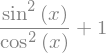

In [7]:
# quotient rule
diff(sin(x)/cos(x), x)

In [8]:
diff(x**x, x)

### Second derivatives, etc.

You should remember that second derivatives are just repeated application of the rules:

$$\frac{d^2}{dx^2}[x^2] = \frac{d}{dx}[2x] = 2$$

In [9]:
# we can use Sympy to take second derivatives too - just add the order after the variable
diff(x**2, x, 2)

In [10]:
# this next line would be the third-order derivative
diff(x**2, x, 3)

### Partial Derivatives

Remember that a first derivative is simply the limit of an infinitesimal change in $x$. If we have functions of more than one variable, we can define a partial derivative similarly:

$$
\left(\frac{\partial f}{\partial x}\right)_{y}=\lim _{\Delta x \rightarrow 0} \frac{f(x+\Delta x, y)-f(x, y)}{\Delta x}
$$

We could define a similar derivative with respect to $y$: (Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/))

<img src="../images/partial-derivative.png" width=300 />

For second derivatives, there are a few possibilities:

$$
f_{x x}=\frac{\partial^{2} f}{\partial x^{2}} \quad f_{y y}=\frac{\partial^{2} f}{\partial y^{2}} \quad f_{x y}=\frac{\partial^{2} f}{\partial x \partial y}=\frac{\partial}{\partial x} f_{y} \quad f_{y x}=\frac{\partial^{2} f}{\partial y \partial x}=\frac{\partial}{\partial y} f_{x}
$$

The key insight is that when taking a derivative with respect to $x$, all other variables (e.g. $y$) are constants.

For example:
$$
\left(\frac{\partial f}{\partial x}\right)_{y}=\frac{\partial}{\partial x}\left(3 x y^{2}+x+2 y^{2}\right)=\frac{\partial}{\partial x} 3 x y^{2}+\frac{\partial}{\partial x} x+\frac{\partial}{\partial x} 2 y^{2}
= 3y^2 + 1
$$

In [15]:
# Sympy already knows how to do partial derivatives
f = 3*x*y**2 + x + 2*y**2
diff(f, x)

What about if we want to take a partial derivative with respect to $y$? Now $x$ is constant:

$$
\begin{aligned}\left(\frac{\partial f}{\partial y}\right)_{x} &=\frac{\partial}{\partial y}\left(3 x y^{2}+x+2 y^{2}\right)=\frac{\partial}{\partial y} 3 x y^{2}+\frac{\partial}{\partial y} x+\frac{\partial}{\partial y} 2 y^{2} \\ &=3 x \frac{\partial}{\partial y} y^{2}+x \frac{\partial}{\partial y} 1+2 \frac{\partial}{\partial y} y^{2}=6 x y+4 y \end{aligned}
$$

In [16]:
# what about if I want the partia derivative with respect to y?
diff(f, y)

 Notice that $\frac{\partial}{\partial x}$ is usually not equal to $\frac{\partial}{\partial y}$
 
 We can also use Sympy to help us take second-order partial derivatives:

In [17]:
diff(f, y, y)

In [12]:
# take the derivative with respect to x, then with respect to y
# e.g., f_xy
diff(f, x, y)

In [13]:
# take the derivative with respect to y, then to x
# e.g. f_yx
diff(f, y, x)

-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>